## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

In [2]:
import datetime

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.


>**Tip**: Please save your work regularly.

**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [3]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


**b.** Use the cell below to find the number of rows in the dataset.

In [5]:
df.shape

(294478, 5)

**c.** The number of unique users in the dataset.

In [6]:
df.user_id.nunique()

290584

**d.** The proportion of users converted.

In [7]:
df.converted.mean()

0.11965919355605512

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [8]:
df.query('group == "treatment" and landing_page != "new_page"').shape

(1965, 5)

In [9]:
df.landing_page.value_counts()

new_page    147239
old_page    147239
Name: landing_page, dtype: int64

**f.** Do any of the rows have missing values?

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


* Proportion of `control` and `treatment` group

In [11]:
(df['group'] == "control").mean()

0.49987435394155083

In [12]:
(df['group'] == "treatment").mean()

0.50012564605844922

In [13]:
df.group.value_counts()

treatment    147276
control      147202
Name: group, dtype: int64

### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [14]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df2 = df.query('(group == "control" and landing_page == "old_page") or (group == "treatment" and landing_page == "new_page")')

In [15]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [16]:
df2.user_id.nunique()

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [17]:
df2.shape

(290585, 5)

In [18]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**c.** Display the rows for the duplicate **user_id**? 

In [19]:
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [20]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 
df2 = df2[~df2.user_id.duplicated()]

# Check again if the row with a duplicate user_id is deleted or not
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted


### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>

>**Tip**: The probability  you'll compute represents the overall "converted" success rate in the population and you may call it $p_{population}$.



In [21]:
p_population = df2['converted'].mean()
p_population

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [22]:
p_control = df2.query('group == "control"')['converted'].mean()
p_control

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [23]:
p_treatment = df2.query('group == "treatment"')['converted'].mean()
p_treatment

0.11880806551510564

>**Tip**: The probabilities you've computed in the points (b). and (c). above can also be treated as means. 
Calculate the actual difference  (`obs_diff`) between the two group means. You will need that later.  

In [24]:
# Calculate the actual difference (obs_diff) between the two group means.
obs_diff = p_treatment - p_control
obs_diff

-0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [25]:
p_new_page = (df2['landing_page'] == "new_page").mean()
p_new_page

0.50006194422266881

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

>With the `landing_page` split into halve for `new_page` and `old_page` and the
probability of convertion in the `old_page` being larger than that of the `new_page` by `0.00158`, I would say the new `treatment` group leads to less conversion than the `control` treatment group.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$
H_0: p_{new} - p_{old} \leq 0  \\
H_1: p_{new} - p_{old} > 0
$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [26]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [27]:
p_old = p_new
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [28]:
n_new = df2.query('group == "treatment"').shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [29]:
n_old = df2.query('group == "control"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [30]:
new_page_converted = np.random.choice([0, 1], size=n_new, p=[1-p_new, p_new])
new_page_converted

array([1, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [31]:
old_page_converted = np.random.choice([0, 1], size=n_old, p=[1-p_old, p_old])
old_page_converted

array([0, 1, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [32]:
new_page_converted.mean() - old_page_converted.mean()

-0.00066984308163499373

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [33]:
p_diffs = []

for _ in range(10000):
    sim_new_page_converted = (np.random.choice([0, 1], size=n_new, p=[1-p_new, p_new])).mean()
    sim_old_page_converted = (np.random.choice([0, 1], size=n_old, p=[1-p_old, p_old])).mean()
    
    p_diffs.append(sim_new_page_converted - sim_old_page_converted)

p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [34]:
p_diff_std = p_diffs.std()
p_diff_std

0.0012135298431108781

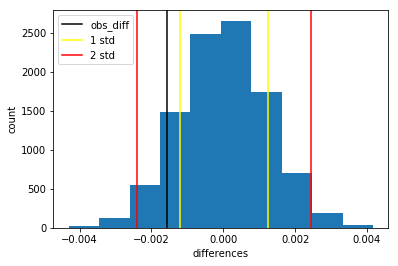

In [35]:
plt.hist(p_diffs);
plt.xlabel('differences');
plt.ylabel('count');

plt.axvline(x=obs_diff, color='black', label='obs_diff');

high_1_std = p_diffs.mean() + p_diff_std
low_1_std = p_diffs.mean() - p_diff_std
plt.axvline(x=high_1_std, color='yellow', label='1 std');
plt.axvline(x=low_1_std, color='yellow');

high_2_std = p_diffs.mean() + (2 * p_diff_std)
low_2_std = p_diffs.mean() - (2 * p_diff_std)
plt.axvline(x=high_2_std, color='red', label='2 std');
plt.axvline(x=low_2_std, color='red');

plt.legend();

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [36]:
(p_diffs > obs_diff).mean()

0.90469999999999995

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

>This is the probability of obtaining our observed statistics, or a value more extreem in favor of the Alternate hypothesis ($H_1$) from the distribution we believe to be true under the Null hypothesis ($H_0$).
>
>Another way to state it is; If $H_0$ is true, the probability of obtaining our observed statistics or one more extreem in favour or the $H_1$.
>
>This is called the ***p_value*** in scientific studies.
>
>The ***p_value*** is high, higher than our **5% Type I error rate $\alpha$**, which shows a high probability of our `obs_diff` coming from this distribution.
>
>From this, we would fail to reject the Null ($H_0$) and we believe the `old_page` leads equal or more conversions than the `new_page`.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [37]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" and converted == 1').shape[0]
convert_new = df2.query('landing_page == "new_page" and converted == 1').shape[0]
n_old = df2.query('landing_page == "old_page"').shape[0]
n_new = df2.query('landing_page == "new_page"').shape[0]
convert_old, convert_new, n_old, n_new

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [38]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, p_value

(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

>`z_score` is the number of standard deviation a point of observation is from the mean. Here we can see our point of observation (the `obs_diff`) is about `1.31` standand deviation away from the mean. 
>
>You can also observe this from the histogram above; The `obs_diff` (in `black line`) is about `1.31` standard deviation below the mean. For a **one tailed test with 95% confidence level**, a `z-score` that does not exceed the **z-critical** value (`1.65`) does not prove the unlikeliness of our null, hence we fail to reject null.
>
>The `p_value` and an observation of the histogram above tells us that there is a `90.5%` probability of obtaining our statistics or a value more extreem in favour of $H_1$ if $H_0$ is true. 
>
>Based on this, we agree with our finding in **j.** and **k.** above and **fail to reject the null hypothesis**.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

>We would be performing a ***Logistic Regression*** 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [39]:
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2['intercept'] = 1
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [40]:
logist_model = sm.Logit(df2['converted'], df2[['ab_page', 'intercept']])
result = logist_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [41]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-09-23 06:46 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
==================================================================

"""

In [42]:
np.exp(-0.0150)

0.98511193960306265

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

>The `p_value` associated with the **independent variable**, `ab_page`, provides information on how statistically significant `ab_page` is in predicting the **response variable**, `conversion`. This `p_value` is related to a hypothesis test of whether the population slope is equal to `0` vs. an alternative when the population slope is not equal to `0`.
>$$
H_0: \beta_1 = 0 \\
H_1: \beta_1 \neq 0
$$
>
>If our `p_value` $\leq \alpha$ and we **reject $H_0$**, it means that the `population slope` of out `independent variable` is different than `0` which gives statistical evidence of a **linear relationship** between the `independent variable` and the `dependent variable`. This in turn suggest that the `independent variable` is helpful in predicting the `dependent variable`. 
>
>This is a **two-sided test** which is different from the **one-sided test** we ran in **Part II**. And with the two-sided test, we still fail to rejuct null because a `p_value` `{0.1899} > {0.05}` ($\alpha$ level) shows no statistical evidence of `ab_page` being very useful in predicting `conversion`.

In [43]:
z_score2, p_value2 = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='two-sided')
z_score2, p_value2

(1.3109241984234394, 0.18988337448195103)

>We get the same `p_value` when we run a **two-sided test** with the method in **Part II**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>It is a good idea to consider other factors to add into our regression model because in practice, there is often more then one factors that influence our response. Building a model based on one `predictor variable` completely ignores all other `predictor variables` that might influence our `response variable`. So in practice we want to build a model with all the `predictor variables` that a actually useful in predicting the `response variable`.
>
>However, when we do this, we need to take note of the word ***"useful"***. A couple of problems arise when we add more predictor variables to our models, one of this is **Multicolinearity**.
>
>**Multicolinearity** is a situation when the predictor variables are correlated with each other. In this case, some predictor variable are surrogates to others.
>
>In our case, we have seen that `ab_page` is not so useful in predicting our response, so we want to consider other variables that might be useful. 

#### Let's check whether the time of the day of visit leads to more conversion.
* First extract time category

In [44]:
# Figuring out the duration of the experiment
sorted_timestamp = df2.timestamp.sort_values()
print(str(sorted_timestamp.head(2)) + '\n\n' + str(sorted_timestamp.tail(2)))

131228    2017-01-02 13:42:05.378582
184884    2017-01-02 13:42:15.234051
Name: timestamp, dtype: object

179072    2017-01-24 13:41:52.604673
193652    2017-01-24 13:41:54.460509
Name: timestamp, dtype: object


>We observe that the experiment was conducted within a month (the month of January 2017).

In [45]:
# Change the datatype of the timestamp column from 'string' to 'datetime' for ease of handling.
df2.timestamp = pd.to_datetime(df2.timestamp)

In [46]:
# Let's split our time values into 4 categories;
# * Early Morning [00:00:00 - 06:00:00)
# * Late Morning [06:00:00 - 12:00:00)
# * Afternoon [12:00:00 - 18:00:00)
# * Night [18:00:00 - 00:00:00)

time_category = {} # Dictionary to hold the time category and it's index in the series

for index, _time in df2.timestamp.dt.time.items():
    if _time < datetime.time(6, 0, 0):
        time_category[index] = 'early_morning'
    elif _time < datetime.time(12, 0, 0):
        time_category[index] = 'late_morning'
    elif _time < datetime.time(18, 0, 0):
        time_category[index] = 'afternoon'
    else:
        time_category[index] = 'night'
        
time_category = pd.Series(time_category)
print(str(time_category.head()) + '\n\n' + str(time_category.tail()))

0            night
1     late_morning
2        afternoon
3            night
4    early_morning
dtype: object

294473            night
294474    early_morning
294475     late_morning
294476    early_morning
294477        afternoon
dtype: object


In [47]:
# Join our "time_cat" series to df2
df2['time_category'] = time_category
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,time_category
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,night
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,late_morning
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,afternoon
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,night
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,early_morning


* Next build model with just time category

In [48]:
# Get time_category dummies
df2 = df2.join(pd.get_dummies(df2['time_category']))
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,time_category,afternoon,early_morning,late_morning,night
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,night,0,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,late_morning,0,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,afternoon,1,0,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,night,0,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,early_morning,0,1,0,0


In [59]:
# Build model with early_morning as baseline
logist_mod2 = sm.Logit(df2['converted'], df2[['intercept', 'late_morning', 'afternoon', 'night']])
result2 = logist_mod2.fit()
result2.summary2()

Optimization terminated successfully.
         Current function value: 0.366103
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-09-23 06:53 AIC:              212775.4512
No. Observations:   290584           BIC:              212817.7698
Df Model:           3                Log-Likelihood:   -1.0638e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
------------------------------------------------------------------
                  Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
intercept        -2.0286   0.0116 -175.1886 0.0000 -2.0513 -2.0059
late_morning      0.0407   0.0163    2.5052 0.0122  0.0089  0.0726
afternoon         0.0413   0.0162    2.5439 0.0110  0.0095  0.0731
night             0.0467   0.0162    2.8792 0.0040  0.0149  0.0785
==================================================================

"""

In [50]:
np.exp(0.0407), np.exp(0.0413), np.exp(0.0467)

(1.0415395967924728, 1.0421647080651766, 1.047807619637706)

>With a `0.05` $\alpha$ `level`, the p_values shows a statistical significance of our `time_category` in predicting the conversion on our website.
>
>We can interprete our coefficients as;
>* Late in the morning, users are 1.04 times more likely to convert than early in the morning.
>* In the aternoon, users are 1.04 times more likely to convert than early in the morning.
>* At night, users are 1.05 more likely to convert than early in the morning.
>
>This seems reasonable as `early_mornings` are the about the time most people are sleepy and would tend not to want to engage more with activities and the `night` time is about the time when people engage more with online activities.



#### Using sklearn to test my model

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix

In [69]:
# Create train and test split of my data
Xtrain, Xtest, ytrain, ytest = train_test_split(df2[['late_morning', 'afternoon', 'night']], df2.converted, test_size=0.33)

# Build and fit model
sk_log_mod = LogisticRegression()
sk_log_mod.fit(Xtrain, ytrain)

# Predict with model
ypred = sk_log_mod.predict(Xtest)

# Compute metrices
print('Precision score: {}\n'.format(precision_score(ytest, ypred)))
print('Recall score: {}\n'.format(recall_score(ytest, ypred)))
print('Accuracy score: {}\n'.format(accuracy_score(ytest, ypred)))
print('Confusion matrix: \n{}'.format(confusion_matrix(ytest, ypred)))

Precision score: 0.0

Recall score: 0.0

Accuracy score: 0.8821916093979748

Confusion matrix: 
[[84596     0]
 [11297     0]]


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [51]:
# Reading the country dataset
df_country = pd.read_csv('countries.csv')
df_country.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [52]:
df_country.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [53]:
# Merge country to df2
df2 = df2.join(df_country.set_index('user_id'), on='user_id')
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,time_category,afternoon,early_morning,late_morning,night,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,night,0,0,0,1,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,late_morning,0,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,afternoon,1,0,0,0,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,night,0,0,0,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,early_morning,0,1,0,0,US


In [54]:
# Creating and joining dummy variables for country column to df2
df2 = df2.join(pd.get_dummies(df2.country))
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,time_category,afternoon,early_morning,late_morning,night,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,night,0,0,0,1,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,late_morning,0,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,afternoon,1,0,0,0,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,night,0,0,0,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,early_morning,0,1,0,0,US,0,0,1


In [55]:
# Now we build and fit our model
logist_mod3 = sm.Logit(df2.converted, df2[['intercept', 'CA', 'US']])
result3 = logist_mod3.fit()
result3.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-09-23 06:46 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9868    0.0114  -174.1736  0.0000  -2.0092  -1.9645
CA           -0.0507    0.0284    -1.7863  0.0740  -0.1064   0.0049
US           -0.0099    0.0133    -0.7458  0.4558  -0.0360   0.0161
==================================================================

"""

>On a **0.05** $\alpha$ **level**, country has no statistical significance in predicting webpage conversion.
>
>Ofcourse we would want this to be so since we want our test sample to as random as possible not biased in favour of any country.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [56]:
# Let's see the interaction between country and page.
logist_mod4 = sm.Logit(df2.converted, df2[['intercept', 'ab_page', 'CA', 'US']])
result4 = logist_mod4.fit()
result4.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-09-23 06:46 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9794    0.0127  -155.4145  0.0000  -2.0044  -1.9544
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
CA           -0.0506    0.0284    -1.7835  0.0745  -0.1063   0.0050
US           -0.0099    0.0133    -0.7433  0.4573  -0.0359   0.0162
==================================================================

"""

>On a **0.05** $\alpha$ **level**, `country` and `ab_page` has no statistical significance in predicting webpage conversion.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [57]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0